# **Anamika Chakrabarty. Independent Project for Course. Working with astronomy data to process and analyze data collected over Paradise, California in late 2018 and 2019. These datasets map land surface temperatures before, during and after the devastating 2018 Camp Fire that swept through that area.


**Tasks accomplished here:**
- Read in the satellite data
- Converted surface temperature data from 16-bit unsigned integer into degrees Kelvin.
- From Kelvin, converted to degrees Celsius and/or Fahrenheit
- Calculated minimum, maximum, median and mean land surface temperatures for each date
- Created a histogram showing temperature distribution by date



Setting up the notebook by accessing the data and importing the needed packages

In [ ]:
# Step 1 - Mounting the Google Drive. User will need to give access to their
#          Google drive for reading/writing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from os import path as path

In [ ]:
new_path = '/content/drive/MyDrive/mySEES'
# The following statement returns a Boolean True if the folder has already been created.
check_folder = os.path.isdir(new_path)

if not check_folder:
  # If the check_folder Boolean value is True, not check_folder will be false.
  # Let's make a new folder named mySEES for our output
  os.makedirs(new_path)
  print("Created folder: {}".format(new_path))
else:
   print("Folder {} already exists.".format(new_path))

Folder /content/drive/MyDrive/mySEES already exists.


In [ ]:
# here is the standard path for Landsat_data_files folder
in_dir = '/content/drive/MyDrive/Landsat_data_files'
#in_dir = '' # Otherwise, uncomment and paste path here.
print("My path to the Landsat_data_files folder is {}".format(in_dir))

My path to the Landsat_data_files folder is /content/drive/MyDrive/Landsat_data_files


In [ ]:
# here is the standard path to your new mySEES folder
out_dir = '/content/drive/MyDrive/mySEES'
#out_dir = '' # If needed, uncomment and paste your path here.
print("My path to the mySEES folder is {}".format(out_dir))

My path to the mySEES folder is /content/drive/MyDrive/mySEES


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

The next two cells are for plotting

In [ ]:
#plot preferances
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

In [ ]:
#function to initialize a plot
def InitializePlot(xLim, xMax, yLim, yMax):
    plt.clf()
    f= plt.figure(figsize=(8,8))
    plt.xlim(xLim, xMax)
    plt.ylim(yLim, yMax)
    plt.xlabel('x')
    plt.ylabel('y')

# The next code cell reads in the date from the Landsat_data_files after creating variables that reference each data file.

# Data Names

Data files are named in order of most past to most recent
*   Data from 10-07-2018 is #1
*   Data from 11-08-2018 is #2
*   Data from 01-27-2019 is #3
*   Data from 09-24-2019 is #4





In [ ]:
#creating variables that reference each data file from the four days (see Data Names)
#text block to see how they are named
TIRS_data_4 = path.join(in_dir, 'LC08_ParadiseCA_20190924_ST_B10_pts.txt')
print(TIRS_data_4)

TIRS_data_3 = path.join(in_dir, 'LC08_ParadiseCA_20190127_ST_B10_pts.txt')
print(TIRS_data_3)

TIRS_data_2 = path.join(in_dir, 'LC08_ParadiseCA_20181108_ST_B10_pts.txt')
print(TIRS_data_2)

TIRS_data_1 = path.join(in_dir, 'LC08_ParadiseCA_20181007_ST_B10_pts.txt')
print(TIRS_data_1)

#these lines of code read in the data from the folder into numpy arrays
point_id_4, K_int16_4, x_centroid_4, y_centroid_4 = np.loadtxt(TIRS_data_4, unpack = True) #whenever we are reading in multiple columns we have to put unpack
point_id_3, K_int16_3, x_centroid_3, y_centroid_3 = np.loadtxt(TIRS_data_3, unpack = True)
point_id_2, K_int16_2, x_centroid_2, y_centroid_2 = np.loadtxt(TIRS_data_2, unpack = True)
point_id_1, K_int16_1, x_centroid_1, y_centroid_1 = np.loadtxt(TIRS_data_1, unpack = True)

/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20190924_ST_B10_pts.txt
/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20190127_ST_B10_pts.txt
/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20181108_ST_B10_pts.txt
/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20181007_ST_B10_pts.txt


# **Creating a function that creates an array of degrees Kelvin Values**
**In the next code block I convert surface temperature data from 16-bit unsigned integer into degrees Kelvin.**

Here's the websites I used to find the formula: <br>
https://supportsi.hexagon.com/help/s/article/Converting-Landsat-8-Thermal-Band-10-to-Temperature-values?language=en_US#:~:text=T%20%3D%20K2%20%2F%20ln%20(,1%2FLl%20%2B1)&text=The%20basic%20formula%20converts%20the,to%20degrees%20Kelvin%20(K).

<br>

https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product


In [ ]:
# this function works by converting the data by finding the TOA Radiance
# TOA radiance fomula : Ll = MlQcal + Al; variables found through looking in Landsat 8-9 guide
#after TOA is found, then it can be converted to at-satellite brightness temp in degrees kelvin
#This is done by using the formula: T = K2 / ln (K1/Ll +1)

#see links for more information

def createKelvinArray(K_int16):
  kelvin_array = K_int16
  for i in range(len(K_int16)):
      TOA = 0.00341802 *K_int16[i] + 149.
      #Level 1 Thermal Constants:
      temp_in_kelvin = 1321.0789/ (np.log(774.8853/TOA + 1))
      kelvin_array[i] = temp_in_kelvin

  return kelvin_array

In [ ]:
#converts the data from the array of kelvin values into celcius and stores it in a new array
def createCelciusArray(kelvin_array):
  celcius_array = kelvin_array
  for i in range(len(kelvin_array)):
    celcius_array[i] = kelvin_array[i] - 273.15

  return celcius_array

In [ ]:
#converting surface temp as 16bit int to kelvin from 09/24/2019 to kelvin and then celcius
kelvin_array_4 = createKelvinArray(K_int16_4)
celcius_array_4 = createCelciusArray(kelvin_array_4)

#converting surface temp as 16bit int to kelvin from 01/27/2019 to kelvin and then celcius
kelvin_array_3 = createKelvinArray(K_int16_3)
celcius_array_3 = createCelciusArray(kelvin_array_3)

#converting from 11-08-2018 to kelvin and then celcius
kelvin_array_2 = createKelvinArray(K_int16_2)
celcius_array_2 = createCelciusArray(kelvin_array_2)

#converting from 10-07-2018 to kelvin and then celcius
kelvin_array_1 = createKelvinArray(K_int16_1)
celcius_array_1 = createCelciusArray(kelvin_array_1)


# Min, max, median, and mean

In [ ]:
#calculating min, max, median, and mean

#10-07-2018
min1 = np.min(celcius_array_1)
max1 = np.max(celcius_array_1)
median1 = np.median(celcius_array_1)
mean1 = np.mean(celcius_array_1)
print('Data from temps on 10-07-2018 in celcius: min:', min1, "max:", max1, 'median1:', median1, 'mean:', mean1 )


#11-08-2018
min2 = np.min(celcius_array_2)
max2 = np.max(celcius_array_2)
median2 = np.median(celcius_array_2)
mean2 = np.mean(celcius_array_2)
print('Data from temps on 11-08-2018 in celcius: min:', min2, "max:", max2, 'median:', median2, 'mean:', mean2 )


#01-27-2019
min3 = np.min(celcius_array_3)
max3 = np.max(celcius_array_3)
median3 = np.median(celcius_array_3)
mean3 = np.mean(celcius_array_3)
print('Data from temps on 01-27-2019 in celcius: min:', min3, "max:", max3, 'median:', median3, 'mean:', mean3)


#09-24-2019
min4 = np.min(celcius_array_4)
max4 = np.max(celcius_array_4)
median4 = np.median(celcius_array_4)
mean4 = np.mean(celcius_array_4)
print('Data from temps on 09-24-2019 in celcius: min:', min4, "max:", max4, 'median:', median4, 'mean:', mean4 )




Data from temps on 10-07-2018 in celcius: min: 454.35131033300684 max: 454.3544974396581 median1: 454.35257483313035 mean: 454.35255406558963
Data from temps on 11-08-2018 in celcius: min: 454.3505474753583 max: 454.3612436863318 median: 454.3520664580893 mean: 454.3529682748868
Data from temps on 01-27-2019 in celcius: min: 454.3504091674221 max: 454.35360304969015 median: 454.3515933787746 mean: 454.3515723920969
Data from temps on 09-24-2019 in celcius: min: 454.3524777428338 max: 454.3557446538322 median: 454.35406335368975 mean: 454.3540003647058


# A histogram that shows temperature distrubtion by date

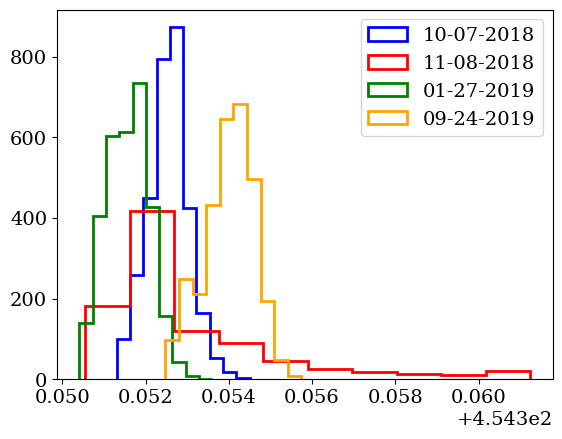

In [ ]:
plt.hist(celcius_array_1, color = 'blue', histtype = 'step', linewidth = 2, label = '10-07-2018', density = True)
plt.hist(celcius_array_2, color = 'red', histtype = 'step', linewidth = 2, label = '11-08-2018', density = True)
plt.hist(celcius_array_3, color = 'green', histtype = 'step', linewidth = 2, label = '01-27-2019', density = True)
plt.hist(celcius_array_4, color = 'orange', histtype = 'step', linewidth = 2, label = '09-24-2019', density = True)
plt.legend()
plt.savefig('histogram.png')
plt.show()


# This was just me experimenting

<Figure size 640x480 with 0 Axes>

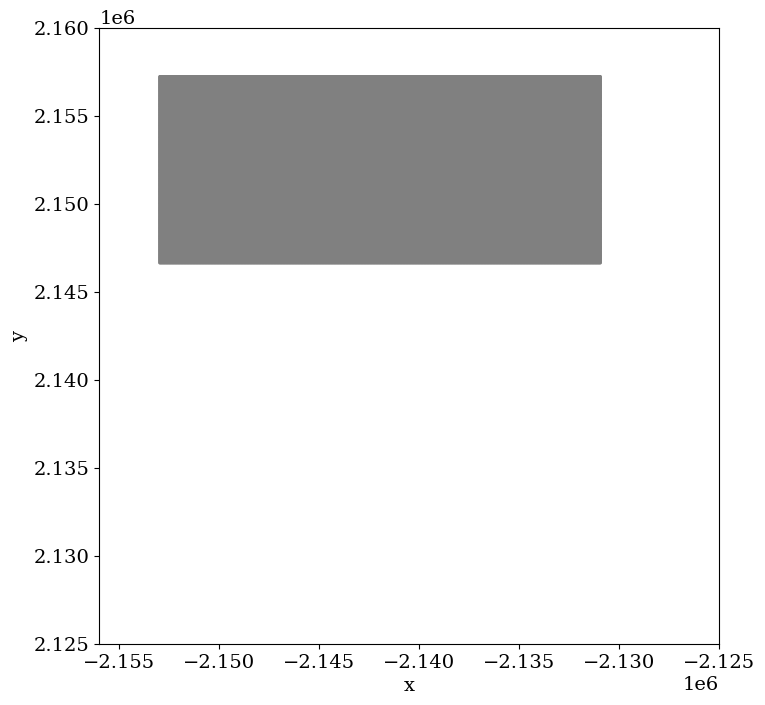

In [ ]:
#f = InitializePlot(-2156000., -2125000., 2125000., 2160000. )
#plt.scatter(x_centroid, y_centroid, c = 'gray', s = 3, edgecolors = 'none')

<Figure size 640x480 with 0 Axes>

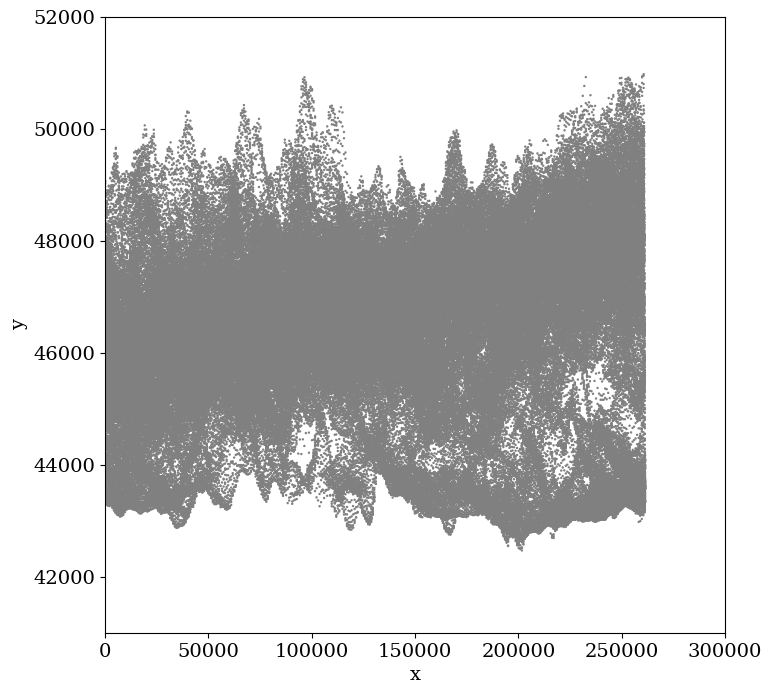

In [ ]:
#g = InitializePlot(0.0, 300000, 41000, 52000 )
#plt.scatter(point_id, K_int16, c = 'gray', s = 3, edgecolors = 'none')